In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/PYTHON/InternSavy-Projects/Task 2/data/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Wrangling
Let's firt understand our data and clean any missing values
I used Data Wrangler extension to give me an overview of the data which made the work easier but i will also go through the data again.

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We have one column with missing values which is 1% of the data hence we will drop the column

In [7]:
df.dropna(subset=['Income'], inplace= True)

Let's work on duplicate rows


In [8]:
def count_duplicate_rows(dataframe):
    # Check for duplicate rows
    duplicate_rows = dataframe.duplicated()
    
    # Calculate the total number of duplicate rows
    total_duplicates = duplicate_rows.sum()
    
    return total_duplicates

total_duplicates = count_duplicate_rows(df)
print(f"Total number of duplicate rows: {total_duplicates}")

Total number of duplicate rows: 0


We have no duplicate rows, let's look at our data and explore it

### Exploratory Analysis
#### Univariate Analysis
We will look at Income, Marital status and education since htey are the major demographic variables in our dataset






In [9]:
# Distribution of income
fig = px.histogram(df, x='Income', histnorm='probability density')

fig.update_layout(
    title='Distribution of Income',
    title_font_family='Courier New, monospace',
    title_font_size=12,
    title_font_color='black',
    title_y=0.95,
    title_x=0.5,
    title_xanchor='center',
    title_yanchor='top'
)

fig.show()

**MARITAL STATUS**

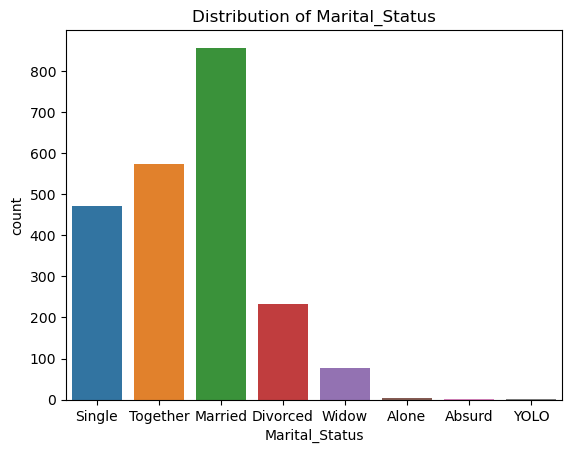

In [10]:
sns.countplot(x='Marital_Status', data=df);
plt.title('Distribution of Marital_Status');

**EDUCATION**

In [11]:
# sns.countplot(x='Education', data=df)
# plt.title('Distribution of Education')

education_distribution = df['Education'].value_counts().reset_index()
education_distribution.columns = ['Education', 'Count']

fig = px.bar(education_distribution, x='Education', y='Count',
             title='Distribution of Education',
             labels={'Education':'Education Level', 'Count':'Count'})

fig.show()

**AGE**


In [12]:
from datetime import date

def get_age(birthyear):
    return date.today().year - birthyear

df['Age'] = df.Year_Birth.map(get_age)

In [13]:
fig = px.histogram(df, x="Age", histnorm='probability density')

fig.update_layout(
    title='Age Distribution',
    title_font_family='Courier New, monospace',
    title_font_size=12,
    title_font_color='black',
    title_y=0.95,
    title_x=0.5,
    title_xanchor='center',
    title_yanchor='top'
)

fig.show()


**PRODUCTS**

In [14]:
def create_histogram(data, color, title, xlabel):
    fig = px.histogram(data, histnorm='probability density')
    fig.update_traces(marker=dict(color=color))
    fig.update_layout(title=title, xaxis_title=xlabel, showlegend=False)
    return fig

fig_wines = create_histogram(df['MntWines'], 'gold', 'Wine Distribution', 'Wine [$]')
fig_fruits = create_histogram(df['MntFruits'], 'mediumturquoise', 'Fruit Distribution', 'Fruit[$]')
fig_meat = create_histogram(df['MntMeatProducts'], 'silver', 'Meat Distribution', 'Meat [$]')
fig_fish = create_histogram(df['MntFishProducts'], 'lightgreen', 'Fish Distribution', 'Fish [$]')

fig_wines.show()
fig_fruits.show()
fig_meat.show()
fig_fish.show()


### Multivariate analysis

Let us compare amount of products bought with their customer marital status. The aim is to identify which group bought which product


In [15]:
# Marital_Status
marital_status = df["Marital_Status"].unique()

mnt_fruits = []
mnt_wines = []
mnt_meat_products = []
mnt_fish_products = []
mnt_sweet_products = []
mnt_gold_prods = []

for status in marital_status:
    mnt_fruits.append(df[df['Marital_Status'] == status]['MntFruits'].sum())
    mnt_wines.append(df[df['Marital_Status'] == status]['MntWines'].sum())
    mnt_meat_products.append(df[df['Marital_Status'] == status]['MntMeatProducts'].sum())
    mnt_fish_products.append(df[df['Marital_Status'] == status]['MntFishProducts'].sum())
    mnt_sweet_products.append(df[df['Marital_Status'] == status]['MntSweetProducts'].sum())
    mnt_gold_prods.append(df[df['Marital_Status'] == status]['MntGoldProds'].sum())
    
fig = go.Figure(data=[
    go.Bar(name='MntFruits', x=marital_status, y=mnt_fruits),
    go.Bar(name='MntWInes', x=marital_status, y=mnt_wines),
    go.Bar(name='MntMeatProducts', x=marital_status, y=mnt_meat_products),
    go.Bar(name='MntFishProducts', x=marital_status, y=mnt_fish_products),
    go.Bar(name='MntSweetProducts', x=marital_status, y=mnt_sweet_products),
    go.Bar(name='MntGoldProds', x=marital_status, y=mnt_gold_prods),
])

fig.update_layout(
    barmode='group',
    title='Products Counts According to Marital Status',
    height=600,
    width=1000
)
fig.show()

In [16]:
def calculate_total_items(df):
    return df['MntFruits'] + df['MntWines'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_items_bought'] = calculate_total_items(df)

px.scatter(df,
           x = 'Income',
           y= 'total_items_bought',
           color = 'Education',
           title = 'Distribution of Income Based on Education Status')

In [17]:
# Total items bought based on marital status
px.scatter(df,
           x = 'Income',
           y = 'total_items_bought',
           color ='Marital_Status',
           title = 'Distribution of Income Based on Marital Status')

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [19]:
df['ID'] = df['ID'].astype(str)

In [20]:
fig = px.scatter(df,
                 x = 'ID',
                 y = 'total_items_bought',
                 color='Education',
                 title='Comparison of Total Items Bought by Customer ID and Education')

fig.update_traces(marker=dict(size=10))
fig.show()

**Number of Web Purchases**


In [22]:
def calculate_total_purchases(df):
    return df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['TotalNumPurchases'] = calculate_total_purchases(df)

fig = px.bar(df, x='TotalNumPurchases', y='total_items_bought', color='Education',
             title='Total Number of Campaign purchase based on Education',
             labels={'TotalNumPurchases':'Total Purchases', 'total_items_bought':'Total Items Bought'})

fig.update_layout(xaxis_title='Total Purchases', yaxis_title='Total Items Bought',
                  title_font_size=24, xaxis_tickfont_size=14, yaxis_tickfont_size=14,
                  height = 600,
                  width = 1000)

fig.show()


In [27]:
# Education
Education = df["Education"].unique()

web_purchases = []
catalog_purchases = []
store_purchases = []
deal_purchases = []
monthly_visits = []

for status in Education:
    web_purchases.append(df[df['Education'] == status]['NumWebPurchases'].sum())
    catalog_purchases.append(df[df['Education'] == status]['NumCatalogPurchases'].sum())
    store_purchases.append(df[df['Education'] == status]['NumStorePurchases'].sum())
    deal_purchases.append(df[df['Education'] == status]['NumDealsPurchases'].sum())
    monthly_visits.append(df[df['Education'] == status]['NumWebVisitsMonth'].sum())
    
    
fig = go.Figure(data=[
    go.Bar(name='NumWebPurchases', x=Education, y=web_purchases),
    go.Bar(name='NumCatalogPurchases', x=Education, y=catalog_purchases),
    go.Bar(name='NumStorePurchases', x=Education, y=store_purchases),
    go.Bar(name='NumDealsPurchases', x=Education, y=deal_purchases),
    go.Bar(name='NumWebVisitsMonth', x=Education, y=monthly_visits),
])

fig.update_layout(
    barmode='group',
    title='Number of Purchases based on Education Level',
    xaxis_title = 'Level Of Education',
    yaxis_title = 'Total Number of Purchases',
    height=600,
    width=1000
)
fig.show()

In [28]:
# Marital_Status
marital_status = df["Marital_Status"].unique()

web_purchases = []
catalog_purchases = []
store_purchases = []
deal_purchases = []
monthly_visits = []

for status in marital_status:
    web_purchases.append(df[df['Marital_Status'] == status]['NumWebPurchases'].sum())
    catalog_purchases.append(df[df['Marital_Status'] == status]['NumCatalogPurchases'].sum())
    store_purchases.append(df[df['Marital_Status'] == status]['NumStorePurchases'].sum())
    deal_purchases.append(df[df['Marital_Status'] == status]['NumDealsPurchases'].sum())
    monthly_visits.append(df[df['Marital_Status'] == status]['NumWebVisitsMonth'].sum())
    
    
fig = go.Figure(data=[
    go.Bar(name='NumWebPurchases', x=marital_status, y=web_purchases),
    go.Bar(name='NumCatalogPurchases', x=marital_status, y=catalog_purchases),
    go.Bar(name='NumStorePurchases', x=marital_status, y=store_purchases),
    go.Bar(name='NumDealsPurchases', x=marital_status, y=deal_purchases),
    go.Bar(name='NumWebVisitsMonth', x=marital_status, y=monthly_visits),
])

fig.update_layout(
    barmode='group',
    title='Number of Purchases based on Marital Status',
    xaxis_title = 'Marital Status',
    yaxis_title = 'Total Number of Purchases',
    height=600,
    width=1000
)
fig.show()

We want to explore diffrent age groups  and their purchasing behaviours.

In [29]:
age_ranges = [0, 10, 20, 30, 50, float('inf')]
age_labels = ['Children', 'Teens', 'Youth', 'Adults', 'Elderly']

df['Age_Group'] = pd.cut(df['Age'], bins=age_ranges,labels=age_labels, right=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,total_items_bought,TotalNumPurchases,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,66,1617,25,Elderly
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,69,27,6,Elderly
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,58,776,21,Elderly
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,39,53,8,Adults
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,42,422,19,Adults


In [31]:
# Number of Purchases based on age_groups
age_group = df["Age_Group"].unique()

web_purchases = []
catalog_purchases = []
store_purchases = []
deal_purchases = []
monthly_visits = []

for age in age_group:
    web_purchases.append(df[df['Age_Group'] == age]['NumWebPurchases'].sum())
    catalog_purchases.append(df[df['Age_Group'] == age]['NumCatalogPurchases'].sum())
    store_purchases.append(df[df['Age_Group'] == age]['NumStorePurchases'].sum())
    deal_purchases.append(df[df['Age_Group'] == age]['NumDealsPurchases'].sum())
    monthly_visits.append(df[df['Age_Group'] == age]['NumWebVisitsMonth'].sum())
    
    
fig = go.Figure(data=[
    go.Bar(name='NumWebPurchases', x=age_group, y=web_purchases),
    go.Bar(name='NumCatalogPurchases', x=age_group, y=catalog_purchases),
    go.Bar(name='NumStorePurchases', x=age_group, y=store_purchases),
    go.Bar(name='NumDealsPurchases', x=age_group, y=deal_purchases),
    go.Bar(name='NumWebVisitsMonth', x=age_group, y=monthly_visits),
])

fig.update_layout(
    barmode='group',
    title='Number of Purchases based on Age',
    xaxis_title = 'Age Groups',
    yaxis_title = 'Total Number of Purchases',
    height=600,
    width=1000
)
fig.show()

Lets divide the adult group further

In [32]:
age_ranges = [0, 10, 20, 30, 40, 50, float('inf')]
age_labels = ['Children', 'Teens', 'Youth', 'MidYouth', 'Adults', 'Elderly']

df['Age_Group1'] = pd.cut(df['Age'], bins=age_ranges,labels=age_labels, right=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,total_items_bought,TotalNumPurchases,Age_Group,Age_Group1
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,66,1617,25,Elderly,Elderly
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,69,27,6,Elderly,Elderly
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,58,776,21,Elderly,Elderly
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,39,53,8,Adults,MidYouth
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,42,422,19,Adults,Adults


In [33]:
# Number of Purchases based on age_groups
age_group = df["Age_Group1"].unique()

web_purchases = []
catalog_purchases = []
store_purchases = []
deal_purchases = []
monthly_visits = []

for age in age_group:
    web_purchases.append(df[df['Age_Group1'] == age]['NumWebPurchases'].sum())
    catalog_purchases.append(df[df['Age_Group1'] == age]['NumCatalogPurchases'].sum())
    store_purchases.append(df[df['Age_Group1'] == age]['NumStorePurchases'].sum())
    deal_purchases.append(df[df['Age_Group1'] == age]['NumDealsPurchases'].sum())
    monthly_visits.append(df[df['Age_Group1'] == age]['NumWebVisitsMonth'].sum())
    
    
fig = go.Figure(data=[
    go.Bar(name='NumWebPurchases', x=age_group, y=web_purchases),
    go.Bar(name='NumCatalogPurchases', x=age_group, y=catalog_purchases),
    go.Bar(name='NumStorePurchases', x=age_group, y=store_purchases),
    go.Bar(name='NumDealsPurchases', x=age_group, y=deal_purchases),
    go.Bar(name='NumWebVisitsMonth', x=age_group, y=monthly_visits),
])

fig.update_layout(
    barmode='group',
    title='Number of Purchases based on Age',
    xaxis_title = 'Age Groups',
    yaxis_title = 'Total Number of Purchases',
    height=600,
    width=1000
)
fig.show()

In [35]:
age_ranges = [0, 15, 25, 35, 45, 55, 70, float('inf')]
age_labels = ['Children', 'Teens', 'Youth', 'MidYouth', 'Adults', 'Elderly', 'Aged']

df['Age_Group2'] = pd.cut(df['Age'], bins=age_ranges,labels=age_labels, right=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,total_items_bought,TotalNumPurchases,Age_Group,Age_Group1,Age_Group2
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,66,1617,25,Elderly,Elderly,Elderly
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,69,27,6,Elderly,Elderly,Elderly
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,58,776,21,Elderly,Elderly,Elderly
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,39,53,8,Adults,MidYouth,MidYouth
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,42,422,19,Adults,Adults,MidYouth


In [36]:
# Number of Purchases based on age_groups
age_group = df["Age_Group2"].unique()

web_purchases = []
catalog_purchases = []
store_purchases = []
deal_purchases = []
monthly_visits = []

for age in age_group:
    web_purchases.append(df[df['Age_Group2'] == age]['NumWebPurchases'].sum())
    catalog_purchases.append(df[df['Age_Group2'] == age]['NumCatalogPurchases'].sum())
    store_purchases.append(df[df['Age_Group2'] == age]['NumStorePurchases'].sum())
    deal_purchases.append(df[df['Age_Group2'] == age]['NumDealsPurchases'].sum())
    monthly_visits.append(df[df['Age_Group2'] == age]['NumWebVisitsMonth'].sum())
    
    
fig = go.Figure(data=[
    go.Bar(name='NumWebPurchases', x=age_group, y=web_purchases),
    go.Bar(name='NumCatalogPurchases', x=age_group, y=catalog_purchases),
    go.Bar(name='NumStorePurchases', x=age_group, y=store_purchases),
    go.Bar(name='NumDealsPurchases', x=age_group, y=deal_purchases),
    go.Bar(name='NumWebVisitsMonth', x=age_group, y=monthly_visits),
])

fig.update_layout(
    barmode='group',
    title='Number of Purchases based on Age',
    xaxis_title = 'Age Groups',
    yaxis_title = 'Total Number of Purchases',
    height=600,
    width=1000
)
fig.show()

In [37]:
# Pie chart
import plotly.express as px

# Grouped DataFrame for percentage calculation
purchases_data = pd.DataFrame({
    'Age_Group2': age_group,
    'NumWebPurchases': web_purchases,
    'NumCatalogPurchases': catalog_purchases,
    'NumStorePurchases': store_purchases,
    'NumDealsPurchases': deal_purchases,
    'NumWebVisitsMonth': monthly_visits
})

for age in age_group:
    data = purchases_data[purchases_data['Age_Group2'] == age]
    total_purchases = data.drop('Age_Group2', axis=1).values.flatten().sum()
    percentages = (data.drop('Age_Group2', axis=1) / total_purchases) * 100

    fig = px.pie(
        percentages,
        names=percentages.columns,
        title=f'Percentage Distribution of Purchases for Age Group: {age}',
        labels={'variable': 'Purchase Type', 'value': 'Percentage'}
    )
    fig.show()


The elderly that is Senior Citizens of ages 55 to 70 amount to 